In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
train_data = pd.read_csv("/datasets/zhengqi_train.txt", sep='\t', encoding='utf-8')
test_data = pd.read_csv("/datasets/zhengqi_test.txt", sep='\t', encoding='utf-8')

In [3]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
data_train1 = train_data.drop(['V5', 'V9', 'V11', 'V17', 'V22', 'V28'], axis = 1)
train_corr = data_train1.corr()
train_corr

,V0,V1,V2,V3,V4,...,V34,V35,V36,V37,target
V0,1.000000,0.908607,0.463643,0.409576,0.781212,...,-0.019342,0.138933,0.231417,-0.494076,0.873212
V1,0.908607,1.000000,0.506514,0.383924,0.657790,...,-0.029115,0.146329,0.235299,-0.494043,0.871846
V2,0.463643,0.506514,1.000000,0.410148,0.057697,...,-0.025620,0.043648,0.316462,-0.734956,0.638878
V3,0.409576,0.383924,0.410148,1.000000,0.315046,...,-0.031898,0.080034,0.324475,-0.229613,0.512074
V4,0.781212,0.657790,0.057697,0.315046,1.000000,...,0.028659,0.100010,0.113609,-0.031054,0.603984
...,...,...,...,...,...,...,...,...,...,...,...
V34,-0.019342,-0.029115,-0.025620,-0.031898,0.028659,...,1.000000,0.233616,-0.019032,-0.006854,-0.006034
V35,0.138933,0.146329,0.043648,0.080034,0.100010,...,0.233616,1.000000,0.025401,-0.077991,0.140294
V36,0.231417,0.235299,0.316462,0.324475,0.113609,...,-0.019032,0.025401,1.000000,-0.039478,0.319309
V37,-0.494076,-0.494043,-0.734956,-0.229613,-0.031054,...,-0.006854,-0.077991,-0.039478,1.000000,-0.565795


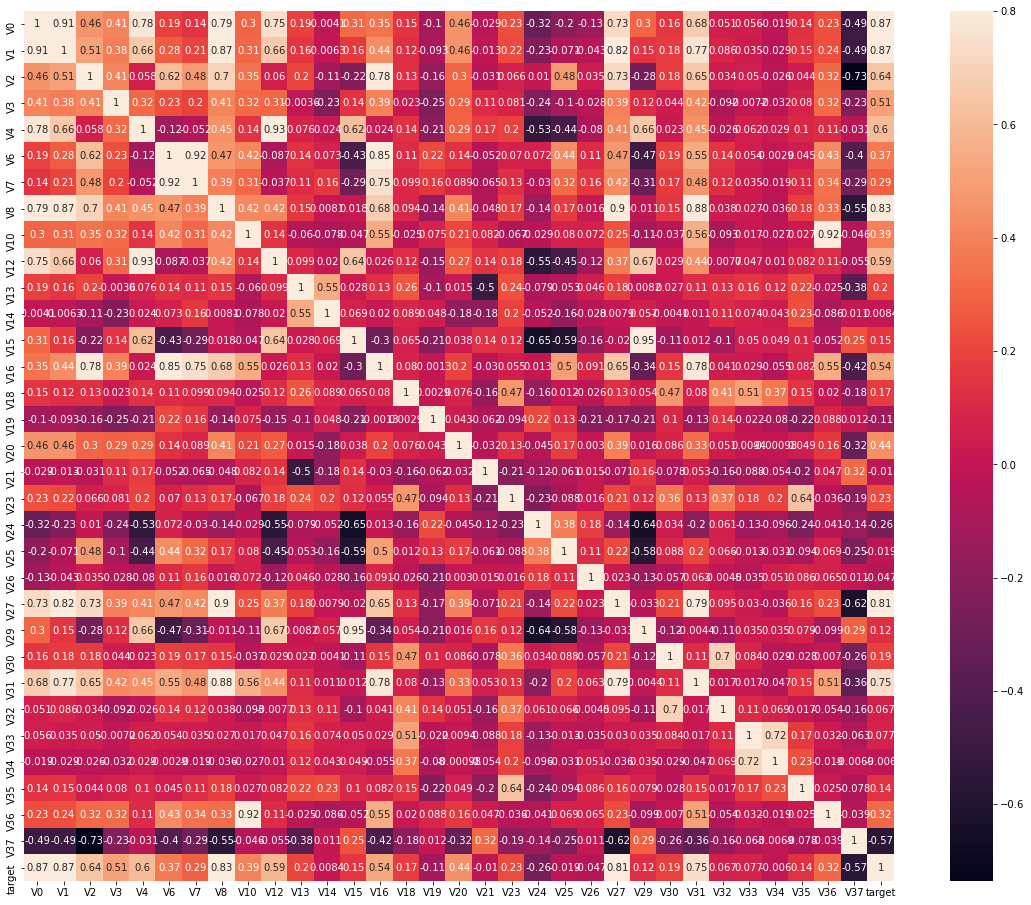

In [8]:
ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(train_corr, vmax=0.8, square=True, annot=True)
annot=True

In [12]:
train_corr

,V0,V1,V2,V3,V4,...,V34,V35,V36,V37,target
V0,1.000000,0.908607,0.463643,0.409576,0.781212,...,-0.019342,0.138933,0.231417,-0.494076,0.873212
V1,0.908607,1.000000,0.506514,0.383924,0.657790,...,-0.029115,0.146329,0.235299,-0.494043,0.871846
V2,0.463643,0.506514,1.000000,0.410148,0.057697,...,-0.025620,0.043648,0.316462,-0.734956,0.638878
V3,0.409576,0.383924,0.410148,1.000000,0.315046,...,-0.031898,0.080034,0.324475,-0.229613,0.512074
V4,0.781212,0.657790,0.057697,0.315046,1.000000,...,0.028659,0.100010,0.113609,-0.031054,0.603984
...,...,...,...,...,...,...,...,...,...,...,...
V34,-0.019342,-0.029115,-0.025620,-0.031898,0.028659,...,1.000000,0.233616,-0.019032,-0.006854,-0.006034
V35,0.138933,0.146329,0.043648,0.080034,0.100010,...,0.233616,1.000000,0.025401,-0.077991,0.140294
V36,0.231417,0.235299,0.316462,0.324475,0.113609,...,-0.019032,0.025401,1.000000,-0.039478,0.319309
V37,-0.494076,-0.494043,-0.734956,-0.229613,-0.031054,...,-0.006854,-0.077991,-0.039478,1.000000,-0.565795


In [17]:
train_corr.nlargest(k, 'target')['target'].index

Index(['target', 'V0', 'V1', 'V8', 'V27', 'V31', 'V2', 'V4', 'V12', 'V16'], dtype='object')

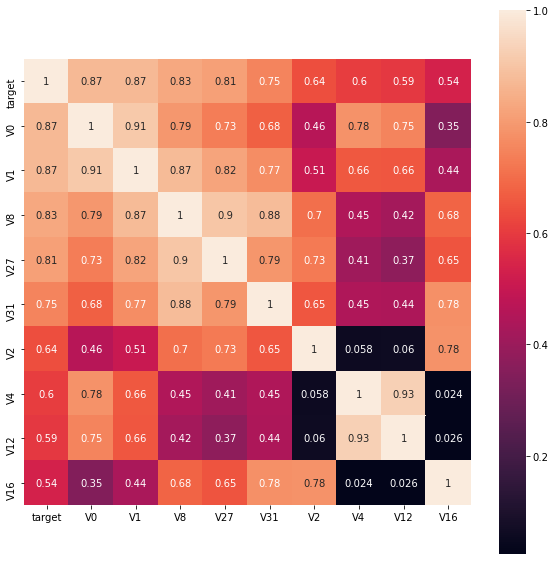

In [6]:
# page 27-28
k = 10
cols = train_corr.nlargest(k, 'target')['target'].index

cm = np.corrcoef(train_data[cols].values.T)
hm = plt.subplots(figsize=(10, 10))
hm = sns.heatmap(train_data[cols].corr(), annot=True, square=True)
plt.show()

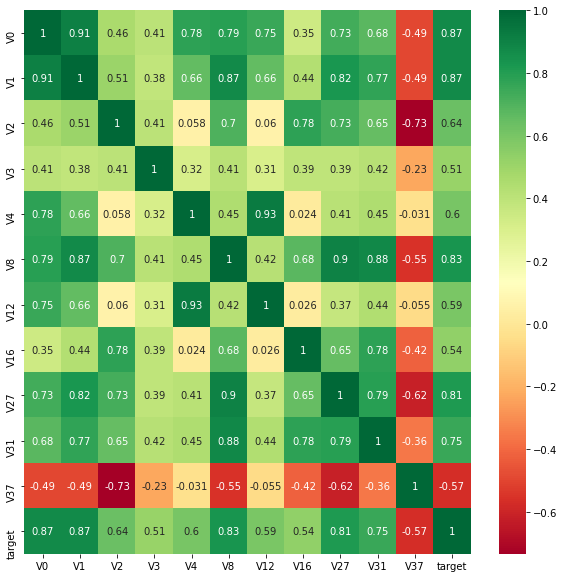

In [7]:
# page 28
threshold = 0.5

corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"]) > threshold]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[top_corr_features].corr(), annot=True, cmap="RdYlGn")